## Mis primeros pasos en Redes Neuronales (Neural Networks)
### Predicción numérica de casas: Regresión lineal multivariada
#### Dr. Gabriel Guerrero
#### saxsa2000@gmail.com
#### FechaCreacion: 20191127
#### Referencia: gg20191127_RedNeuronal_PredicciónNumerica_ValorCasas.ipynb


Introducción

Este cuaderno (notebook de python) contiene el ejemplo, modificado y aumentado, del Capitulo 3, Sección 6 del libro Deep Learning with Python, del gran maestro y autor de Keras, F Chollet.

El URL del libro:

(https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff).

Se los recomiendo ampliamente. Este autor además de ser un gran innovador, su transmisión de conocimientos por medio de su libro, es una obra de arte para los que nos apasionan los temas alrededor de las aplicaciones de la Matemática y la Ciencia de Datos.

En este ejemplo se muestra el uso de la biblioteca Keras con Python para la predicción numérica de valores de casas, conocido como algoritmo supervisado de regresión lineal. Este es el problema de la regresión lineal multivariada.

Este es un ejercicio tradicional en Inteligencia Artificial y constituye un ejemplo  "Hola Mundo de Predicción numérica de valores continuos" ("Hello World Predicting a continuous value"), como existe en todos los ámbitos de la programación.


La regresión lineal múltiple permite:

identificar que variables independientes (causas) explican una variable dependiente (resultado)

predecir valores de una variable, es decir, a partir de unas características predecir de forma aproximada un comportamiento o estado


In [1]:
import matplotlib.pyplot as plt
### import numpy
import numpy as np


%matplotlib inline

In [2]:
import keras
from keras.models import model_from_json

###keras.__version__

Using TensorFlow backend.
/home/saXsa/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/saXsa/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/saXsa/anaconda3/envs/keras/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/saXsa/anaconda3/envs


# Predicción de un valor numérico. Valor de una casa.
# Algoritmo: regresión lineal


Un ejemplo de aplicación del Aprendizaje Automatizado (Machine Learning) Supervisado es la predicción de un valor numérico por medio de un algoritmo conocido como "regresión" o regresión lineal.

En el caso presente, se tiene un conjunto de datos de valor en dólares de casas de Boston. Por medio de los costos conocidos de casas basados en varias características, se debe predecir el costo de una casa que no se encuentra en el conjunto de datos inicial.

Es decir, utilizando este conjunto de datos, se desea realizar un modelo que permita predecir el valor de otras casas que no se encuentran en el conjunto de datos.

Este es un ejemplo tradicional del Aprendizaje Automatizado Supervisado, en donde se cuenta con diversas características conocidas y el valor de un producto. Por medio de estos datos se desea establecer un mecanismo de predicción para otros productos con mismo conjunto de características, pero que no se conozca su valor. Es decir, deseamos predecir el valor de un producto que no se encuentra en los anteriores. Este es el problema de la regresión lineal multivariada o múltiple clasico de la Estadistica.

La regresión lineal múltiple permite:

identificar que variables independientes (causas) explican una variable dependiente (resultado)

predecir valores de una variable, es decir, a partir de unas características predecir de forma aproximada un comportamiento o estado


## El conjunto de datos de casas de Boston para predicción del precio


El conjunto de datos tiene un total de 506 registros, repartidos como 404 datos de entrenamiento y 102 datos para la evaluación del modelo.

Las características (features) de los registros miden aspectos diferentes de la casa, por ejemplo tasa de criminalidad, tasa de impuestos locales de predial, y otros. En el caso presente se tienen 13 características para cada casa y un precio en dólares del valor de la casa.


El objetivo del modelo es predecir el precio promedio de las casas en el mismo vecindario, dados algunos parámetros o características (features) como la tasa de crimenes (crime rate), la tasa impositiva del predio (local property tax rate), y otras características similares. 

Cada una de estas características tiene un rango diferente de valores y medidas diferentes, por lo que según las mejores prácticas de la estadística, se requiere normalizar en una primera etapa, todas las características a valores entre 0 y 1.

En este contexto se tiene un número reducido de puntos, en total 506 con 404 de entrenamiento y 102 para evaluación. Esto nos sugiere según las mejores prácticas utilizar un método de pruebas y evaluación conocido como **Validacion cruzada con k elementos** ("K-fold cross-validation").


Los datos del proyecto se encuentran en la biblioteca keras y se obtienen por medio de una función **load_data()** que se encuentra en el modulo keras.datasets


In [3]:
from keras.datasets import boston_housing

(train_data, train_targets), (evaluation_data, evaluation_targets) =  boston_housing.load_data()

Por medio de este enunciado se obtienen 4 conjuntos de datos.

Dos conjuntos de datos que contienen las características y etiquetas para el entrenamiento, denominados

(train_data, train_targets)

Dos conjuntos de datos que contienen las características y etiquetas para la evaluación, denominados

(evaluation_data, evaluation_targets) 



## Análisis Exploratorio de Datos

Por medio de enunciados Python podemos analizar el tipo, estructura y contenido de estos conjuntos de datos



In [4]:
train_data.dtype

dtype('float64')

In [5]:
train_data.shape

(404, 13)

In [6]:
train_data[0].shape

(13,)

In [7]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

Esto nos indica que cada punto del conjunto de 404 datos de train_data tiene 13 valores.

Como se observa los valores tienen órdenes de magnitud muy dispersos.



In [8]:
train_targets.dtype

dtype('float64')

In [9]:
train_targets.shape

(404,)

In [10]:
train_targets[0]

15.2

Esto nos indica que la etiqueta del primer punto (casa) del conjunto tiene un valor de 15,200 dolares. Recordemos que la cantidad esta expresada en miles de dólares.

In [11]:
evaluation_data.dtype

dtype('float64')

In [12]:
evaluation_data.shape

(102, 13)

In [13]:
evaluation_data[0].shape

(13,)

In [14]:
evaluation_data[0]

array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
       100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
        29.05  ])

In [15]:
evaluation_targets[0]

7.2

Como se observa de la salida del código Python, el conjunto de datos de entrenamiento tiene un total de 404 registros y 13 características

Tenemos las siguientes características de las casas para evaluar su precio, tal vez no aplicables a México:

1. Tasa de criminalidad per cápita. (Per capita crime rate.)

2. Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados. (proportion of residential land zoned for lots over 25,000 square feet.)
  
3. Proporción de acres de negocios no minoristas por ciudad. (Proportion of non-retail business acres per town.)
  
4. Variable Si/No de colindancia con el rio Charles River, Si= 1 si el tramo limita el río, No=0 de lo contrario. (Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
  
5. Concentración de óxidos nítricos, partes por 10 millones. (Nitric oxides concentration, parts per 10 million)
  
6. Promedio de habitaciones por vivienda. (Average number of rooms per dwelling.)
    
7. Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.  (Proportion of owner-occupied units built prior to 1940)
    
8. Distancias ponderadas a cinco centros de empleo de Boston. (Weighted distances to five Boston employment centres)

9. Índice de accesibilidad a carreteras radiales. (Index of accessibility to radial highways.)

10.  Tasa de impuesto a la propiedad de valor completo por $10,000. (Full-value property-tax rate per $10,000)

11. Proporción de alumno / profesor en la ciudad. (Pupil-teacher ratio by town)

12. Medida habitantes de origen piel negra. 1000 * (Bk - 0.63) ** 2 donde Bk es la proporción de personas negras por ciudad. (Bk is the proportion of Black people by town)

13. % de la población de menores recursos. 

La etiqueta es el valor promedio del costo de la casa en miles de dólares. Estos precios son de los años 1970 y oscilan entre 10,000 y 50,000 dólares

In [17]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [18]:
train_targets[0]

15.2

### Preparación de los datos de entrada

Como se observa, las características (features) de los puntos en los conjuntos de datos toman valores en diferentes escalas. Por lo que deben homogeneizarse con un proceso que denominamos <strong>Preparación de los datos de entrada</strong>

La preparacion de los datos es una de las actividades estratégicas en la Inteligencia Artificial y en general en la Ciencia de Datos. Esto es esencial para que los modelos matemáticos que se construyen, tengan resultados con significado. 

Dada la diversidad de rangos y medidas diferentes de las características, un buena práctica en estadistica es normalizar las características, tomando por cada característica (una columna en los datos de entrada), la **media** (mean) de sus valores, restarla al valor actual y dividir el resultado por la **desviación estándar**.

Por medio de este procedimiento, el valor de la característica esta centrada alrededor del valor 0 y tendrá una desviación estándar unitaria.

Para realizar esta normalización se utiliza la biblioteca Python Numpy.

In [19]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [20]:
mean = train_data.mean(axis=0)


In [21]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [22]:
train_dataCentradoMedia = train_data - mean

In [24]:
train_dataCentradoMedia[0]

array([-2.51264057e+00, -1.14801980e+01, -2.96443069e+00, -6.18811881e-02,
       -1.93559406e-02, -1.25081683e-01,  2.26893564e+01,  2.36629208e-01,
       -5.44059406e+00, -9.88985149e+01,  2.52400990e+00,  4.21168317e+01,
        5.97918317e+00])

In [25]:
stdCentradoMedia = train_dataCentradoMedia.std(axis=0)

stdCentradoMedia

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [26]:
train_dataCentradoMediaNormalizadoDesviacionEstandar = train_dataCentradoMedia / stdCentradoMedia

In [27]:
train_dataCentradoMediaNormalizadoDesviacionEstandar[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [28]:
stdCentradoMedia.dtype

dtype('float64')

In [29]:
stdCentradoMedia.shape

(13,)

In [30]:
train_dataCentradoMediaNormalizadoDesviacionEstandar[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [31]:
train_dataCentradoMediaNormalizadoDesviacionEstandar.shape[1]

13

In [32]:
evaluation_data[0]

array([ 18.0846,   0.    ,  18.1   ,   0.    ,   0.679 ,   6.434 ,
       100.    ,   1.8347,  24.    , 666.    ,  20.2   ,  27.25  ,
        29.05  ])

In [33]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [34]:
evaluation_dataCentradoMedia = evaluation_data - mean

In [35]:
evaluation_dataCentradoMedia[0]

array([ 1.43394894e+01, -1.14801980e+01,  6.99556931e+00, -6.18811881e-02,
        1.21644059e-01,  1.66918317e-01,  3.09893564e+01, -1.90557079e+00,
        1.45594059e+01,  2.60101485e+02,  1.72400990e+00, -3.27533168e+02,
        1.63091832e+01])

In [36]:
evaluation_dataCentradoMediaNormalizadoDesviacionEstandar =  evaluation_dataCentradoMedia / stdCentradoMedia

In [37]:
evaluation_dataCentradoMediaNormalizadoDesviacionEstandar[0]

array([ 1.55369355, -0.48361547,  1.0283258 , -0.25683275,  1.03838067,
        0.23545815,  1.11048828, -0.93976936,  1.67588577,  1.5652875 ,
        0.78447637, -3.48459553,  2.25092074])

In [39]:
train_dataCentradoMediaNormalizadoDesviacionEstandar.shape[1]

13

Es importante mencionar que para efectuar la normalizacion del conjunto de pruebas (evaluation_data) se utiliza la media y desviación estandar del conjunto de datos de entrenamiento

Como una buena práctica de redes neuronales, se recomienda nunca utilizar en el flujo de la construccion ningún valor del conjunto de pruebas (evaluation_data)




## Construcción de la red neuronal para la predicción del precio de casas

Dado que el conjunto de datos tiene muy pocos registros, se construye una red neuronal con dos capas ocultas (hidden layers), cada una de las capas con 64 unidades.

Como una buena práctica en Redes Neuronales, cuando se tienen pocos datos de entrenamiento se recomienda utilizar una red neuronal pequeña como una práctica para mitigar el **overfitting**  o sobre ajuste o entrenamiento en exceso del modelo.

In [38]:
from keras import models
from keras import layers

def build_model():
    # 
    # Dado que se requiere generar instancias del mismo modelo
    # en multiples ocasiones, utilizamos una funcion para construirlo
    #

    
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_dataCentradoMediaNormalizadoDesviacionEstandar.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# Definición Red Neuronal con keras

El concepto base de una red neuronal es la **capa** (layer).

En la construcción de una red neuronal se debe definir cada una de las capas (layer).

Una capa es un modulo de procesamiento de datos (data-processing module) que puede pensarse como un filtro que recibe datos y los transforma en otra representación que aporta valor a su entendimiento y a la solución de la problemática.

Algunos datos entran en la capa y salen otros de la capa, con una representación de mayor utilidad para la solución del problema. (Some data comes in, and comes out in a more useful form). 

El concepto del Aprendizaje Profundo se refiere a encadenar capas sencillas que instrumentan una especie de proceso progresivo de "destilación de datos" (progressive "data distillation"). 

En el caso presente, la red neuronal consiste de una secuencia de dos capas `Dense`, con función de activación "relu", Rectified Linear Unit.

Una capa tipo **Dense** tambien se conoce como **capa neuronal totalmente conectada** ("fully-connected neural layer"). Es decir, todas las neuronas de esta capa se conectan con las neuronas de la siguiente capa. 

Se define el tipo de red: **Sequential()**

Se añade cada una de las capas (layer).

La primera capa con tipo **Dense()**, número de neuronas en la capa, en el caso presente tenemos, 64

La función de activación de la capa **activation='relu'**, y el tipo de forma de la entrada de los datos que se entregan a la red: **input_shape='784'**

La segunda capa con tipo Dense(), número de neuronas en la capa (64), la función de activación de la capa:
**activation='relu'**

La tercera capa tiene 1 neuronas sin función de activación.




La red neuronal al final tiene una sola neurona y no contiene función de activación.

Este es el caso de una capa lineal o regresion lineal escalar en donde se debe establecer una predicción numérica de un solo valor continuo (predict a single continuous value). 


Observamos que estamos compilando la red con una función de perdida `mse` (Mean Squared Error).

La función de pérdida mse es el cuadrado del error, es decir el cuadrado de la diferencia entre las predicciones y el objetivo (targets). 

Este es una función de error ampliamente utilizada en problemas de regresión lineal. 


En la etapa de entrenamiento se utiliza otra métrica:  `mae` (Mean Absolute Error).

Error Absoluto Promedio. El error absoluto promedio es una medida común del error de pronóstico en análisis de series de tiempo.

$\mathrm{MAE}=\frac{\mathrm{SAE}}{N}=\frac{\sum_{i=1}^N \left | x_i - \hat x_i \right |}{N}$

SAE es la suma de los errores absolutos (o desviaciones)

{$x_i$} son la observaciones actuales de las series de tiempo

{$\hat x_i$} es la serie de tiempo estimada o pronosticada





## Validación del modelo utilizando la validación de tipo K-fold (K-fold validation)


Para evaluar la red neuronal en la etapa de ajuste de sus parámetros (por ejemplo el número de épocas utilizadas en el entrenamiento), podemos de forma sencilla partir los datos en un conjunto de entrenamiento (training set) y un conjunto de validación o pruebas (validation set)

Sin embargo, dado que se cuenta con un número limitado de puntos, el conjunto de pruebas o validación sera muy pequeño.

En circunstancias similares, una de las mejores prácticas en Estadística es utilizar un método de validación denominado **Validacion cruzada con k elementos** ("K-fold cross-validation")

El método consiste en partir el conjunto de datos disponibles en K particiones, generalmente se selecciona K=4 o K=5. 

Una vez construidos K modelos idénticos y habiendo realizado el entrenamiento de cada uno con K - 1 particiones y entrenando con la partición restante, el **score de validación del modelo es el promedio de los scores de las K validaciones obtenidas**


En términos de código, tenemos lo siguiente:

In [40]:

k = 4
num_val_samples = len(train_dataCentradoMediaNormalizadoDesviacionEstandar) // k

In [41]:
len(train_dataCentradoMediaNormalizadoDesviacionEstandar)

404

In [42]:
num_val_samples

101

In [44]:
num_epochs = 25
all_scores = []
for i in range(k):
    print(' ')
    print('procesando partición  (k-fold) k = ', i)
    # Prepare the validation data: data from partition # k
    val_data = train_dataCentradoMediaNormalizadoDesviacionEstandar[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    val_data_forma = val_data.shape
    print('Forma (shape) del val_data ', val_data_forma)
    
    val_targets_forma = val_data.shape
    print('Forma (shape) del val_targets ', val_targets_forma)

    # Prepare the training data: data from all other partitions
    print('construyendo  partial_train_data particion (k-fold) k = ', i)
    partial_train_data = np.concatenate(
        [train_dataCentradoMediaNormalizadoDesviacionEstandar[:i * num_val_samples],
         train_dataCentradoMediaNormalizadoDesviacionEstandar[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_data_forma = partial_train_data.shape
    print('Forma (shape) del partial_train_data ', partial_train_data_forma)
   
    
    
    print('construyendo  partial_train_targets partición (k-fold) k = ', i)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    partial_train_targets_forma = partial_train_targets.shape
    print('Forma (shape) del partial_train_targets ', partial_train_targets_forma)
   
    
    # Construccion del modelo con Keras  (already compiled)
    print('Construccion del modelo Keras de la partición  (k-fold) k = ', i)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    print('Entrenando fit el modelo de la particion (k-fold) k = ', i)
    historia100 = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets),
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    print('Llaves history del modelo de la partición (k-fold) k = ', i)
    print(historia100.history.keys())
    
    val_mae = historia100.history['val_mean_absolute_error']
    all_scores.append(val_mae)
    

    print('Fin modelo partición (k-fold) k = ', i)

 
procesando partición  (k-fold) k =  0
Forma (shape) del val_data  (101, 13)
Forma (shape) del val_targets  (101, 13)
construyendo  partial_train_data particion (k-fold) k =  0
Forma (shape) del partial_train_data  (303, 13)
construyendo  partial_train_targets partición (k-fold) k =  0
Forma (shape) del partial_train_targets  (303,)
Construccion del modelo Keras de la partición  (k-fold) k =  0
Entrenando fit el modelo de la particion (k-fold) k =  0
Llaves history del modelo de la partición (k-fold) k =  0
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
Fin modelo partición (k-fold) k =  0
 
procesando partición  (k-fold) k =  1
Forma (shape) del val_data  (101, 13)
Forma (shape) del val_targets  (101, 13)
construyendo  partial_train_data particion (k-fold) k =  1
Forma (shape) del partial_train_data  (303, 13)
construyendo  partial_train_targets partición (k-fold) k =  1
Forma (shape) del partial_train_targets  (303,)
Construccion del modelo Keras d

In [48]:
len(all_scores)

4

In [52]:
len(all_scores[0])

25

In [53]:
all_scores[0]

[4.086179922122766,
 3.0152902131033414,
 2.9820251842536547,
 2.5420896983382724,
 2.448185033137255,
 2.462728226538932,
 2.2883730406808382,
 2.0762589804016716,
 2.290176353832283,
 2.5326382759774084,
 1.9830983794561707,
 2.365296750965685,
 2.186893685029285,
 2.3952969843798346,
 2.5737504392567248,
 2.025221097587359,
 2.508830684246403,
 1.959319794532096,
 2.2789272837119525,
 2.2288318482956084,
 2.1926814258688747,
 1.957686169312732,
 2.1637579851811477,
 1.9714486622574305,
 1.989423109753297]

In [54]:
PromedioMAE_K_FOLD_VALIDATION = np.mean(all_scores)
PromedioMAE_K_FOLD_VALIDATION

2.683033071248838

Como puede observar, las diferentes ejecuciones sí muestran puntuaciones de validación bastante diferentes, de 2.0 a 2.9. Sin embargo, su promedio es una métrica mucho más confiable que cualquiera de estos puntajes: ese es el punto completo de la validación cruzada de K-fold. En este caso, estamos fuera de 2.400 dolares en promedio, lo que sigue siendo significativo si se considera que os precios varían de 10.000 a 50.000 dolares.

Intentemos entrenar la red un poco más, con más épocas. Para mantener un registro de qué tan bien se desempeñó el modelo en cada época, modificaremos nuestro ciclo de entrenamiento para guardar el registro de puntuación de validación por época:

Usando el backend de Keras para escribir nuevo código.

Si desea que los módulos de Keras que escriba sean compatibles con Theano (th) y TensorFlow (tf), debe escribirlos a través del API de backend de Keras. Aquí hay una introducción.

Puede importar el módulo backend a través de:

In [55]:
from keras import backend as K

clear_session

keras.backend.clear_session ()

Destruye el gráfico TF actual y crea uno nuevo.

Útil para evitar el desorden de los viejos modelos / capas.


In [56]:
# Some memory clean-up
K.clear_session()

# Acceso a la historia de entrenamiento modelo en Keras

Keras proporciona la capacidad de registrar devoluciones de llamada cuando se entrena un modelo de aprendizaje profundo.

Una de las devoluciones de llamada predeterminadas que se registra cuando se entrena a todos los modelos de aprendizaje profundo es la devolución de llamada del historial.

Registra métricas de entrenamiento para cada época.

Esto incluye la pérdida y la precisión (para problemas de clasificación), así como la pérdida y la precisión para el conjunto de datos de validación, si se establece uno.

El objeto histórico se devuelve de las llamadas a la función fit() utilizada para entrenar el modelo.

Las métricas se almacenan en un diccionario en el miembro histórico del objeto devuelto.



keras.callbacks.History ()

Devolución de llamada que registra eventos en un objeto Historial.

Esta devolución de llamada se aplica automáticamente a todos los modelos de Keras.

El objeto Historial se devuelve por el método de ajuste de modelos.


Por ejemplo, puede enumerar las métricas recopiladas en un objeto de historial utilizando el siguiente fragmento de código después de que se entrena un modelo:

	
# Listar los datos historicos
print(history.history.keys())

Por ejemplo, para un modelo entrenado en un problema de clasificación con un conjunto de datos de validación, esto podría producir el siguiente listado:

['acc', 'loss', 'val_acc', 'val_loss']

Podemos usar los datos recopilados en el objeto histórico para crear gráficos.

Los gráficos pueden proporcionar una indicación de cosas útiles sobre la capacitación del modelo, tales como:

    
    Es la velocidad de convergencia en épocas (pendiente).
    
    Si el modelo ya puede haber convergido (meseta de la línea).
    
    Si el modelo puede estar sobre-aprendiendo los datos de entrenamiento (inflexión para la línea de validación).
    
    
Puede aprender mucho sobre redes neuronales y modelos de aprendizaje profundo observando su desempeño a lo largo del tiempo durante el entrenamiento.


In [62]:
k = 4
num_val_samples = len(train_dataCentradoMediaNormalizadoDesviacionEstandar) // k
print('num val samples', num_val_samples)
num_epochs = 50
all_mae_histories = []
for i in range(k):
    print(' ')
    print('procesando fold #', i)
    # Prepare the validation data: data from partition # k
    inicio_train = i * num_val_samples
    print('inicio train ', inicio_train)
    fin_train = (i + 1) * num_val_samples
    print('fin train ', fin_train)
    val_data = train_dataCentradoMediaNormalizadoDesviacionEstandar[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_dataCentradoMediaNormalizadoDesviacionEstandar[:i * num_val_samples],
         train_dataCentradoMediaNormalizadoDesviacionEstandar[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    print('Construccion del modelo de fold', i)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    print('Llaves history del modelo  fold', i)
    print(history.history.keys())
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

num val samples 101
 
procesando fold # 0
inicio train  0
fin train  101
Construccion del modelo de fold 0
Llaves history del modelo  fold 0
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
 
procesando fold # 1
inicio train  101
fin train  202
Construccion del modelo de fold 1
Llaves history del modelo  fold 1
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
 
procesando fold # 2
inicio train  202
fin train  303
Construccion del modelo de fold 2
Llaves history del modelo  fold 2
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])
 
procesando fold # 3
inicio train  303
fin train  404
Construccion del modelo de fold 3
Llaves history del modelo  fold 3
dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


Luego podemos calcular el promedio de las puntuaciones MAE por época:

In [63]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [64]:
average_mae_history

[4.181876992235089,
 3.208520504507688,
 3.0475226310220096,
 2.9913864230165386,
 2.7121169213021155,
 2.7716538138908913,
 2.644772484751031,
 2.579562712423872,
 2.607160267263356,
 2.5494620198070415,
 2.5653579093442103,
 2.633371362591734,
 2.5784485942066304,
 2.3775926167422,
 2.4173102272619116,
 2.4338266318387323,
 2.373731783120939,
 2.4622976856656593,
 2.43006427925412,
 2.567012031479637,
 2.40213012046153,
 2.4216556726115765,
 2.409531796332633,
 2.562809097884905,
 2.3734118194863347,
 2.554314298204856,
 2.402770645547621,
 2.4137075832574677,
 2.57837706509203,
 2.4316330044576437,
 2.3681443068060544,
 2.3276885464639947,
 2.4350600431461147,
 2.318875259692126,
 2.350020455841971,
 2.3493287480703677,
 2.3928722532668916,
 2.3283621721928665,
 2.324513671421769,
 2.496203799058895,
 2.2840071172997503,
 2.21836777252726,
 2.3411052911588457,
 2.281672729123937,
 2.3705149074592216,
 2.2869226377789333,
 2.4006598302633453,
 2.3453114410438163,
 2.2758974403438,
 2

Grafica de resultados

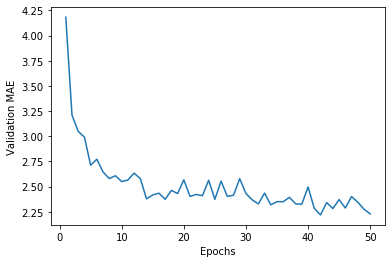

In [65]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Puede ser un poco difícil ver el gráfico debido a problemas de escala y una variación relativamente alta. 
Vamos a:

* Omitir los primeros 10 puntos de datos, que están en una escala diferente del resto de la curva.
* Reemplazar cada punto con un promedio móvil exponencial de los puntos anteriores, para obtener una curva suave.

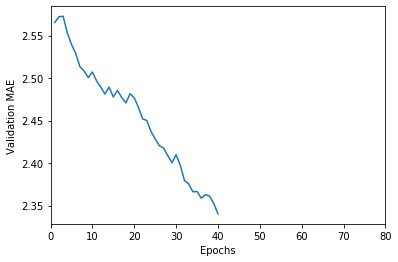

In [66]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points: 
        #Esto nos sugiere segun las mejores practicas utilizar un metodo de pruebas y 
        #evaluacion conocido como Validacion cruzada con k elementos 
        ##("K-fold cross-validation").
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.xlim(0, 80)

plt.show()

Según este gráfico, parece que la validación MAE deja de mejorar significativamente después de 80 épocas. Más allá de ese punto, comenzamos a sobreajustar.

Una vez que hayamos terminado de ajustar otros parámetros de nuestro modelo (además del número de épocas, también podríamos ajustar el tamaño de las capas ocultas),
puede entrenar un modelo de "producción" final en todos los datos de entrenamiento, con los mejores parámetros, y luego observar su desempeño en los datos de prueba:


### Generación modelo con todos los registros del Conjunto de Datos

In [67]:
# Get a fresh, compiled model.
modeloConTodosDatos = build_model()




all_mae_historiesConTodosDatos = []

EpocasConTodosDatos = 25

# Train it on the entirety of the data.
historiaConTodosDatos = modeloConTodosDatos.fit(train_dataCentradoMediaNormalizadoDesviacionEstandar, train_targets, validation_data=(evaluation_dataCentradoMediaNormalizadoDesviacionEstandar, evaluation_targets),
          epochs=EpocasConTodosDatos, batch_size=16, verbose=0)
###test_mse_score, test_mae_score = model.evaluate(evaluation_dataCentradoMediaNormalizadoDesviacionEstandar, evaluation_targets)

print(historiaConTodosDatos.history.keys())

val_maeConTodosDatos = historiaConTodosDatos.history['val_mean_absolute_error']
    
all_mae_historiesConTodosDatos.append(val_maeConTodosDatos)

dict_keys(['val_loss', 'val_mean_absolute_error', 'loss', 'mean_absolute_error'])


In [68]:
val_maeConTodosDatos

[19.244684294158336,
 14.128729726753983,
 8.691146383098527,
 5.31276548610014,
 4.584290008918912,
 4.305041397319121,
 3.96158888760735,
 3.8130804230185116,
 3.790125482222613,
 3.5620634789560355,
 3.518231560202206,
 3.5365774210761574,
 3.396416710872276,
 3.4489667275372673,
 3.242466543235031,
 3.1846607339148427,
 3.1975504463794184,
 3.2060722276276232,
 3.1508709496142817,
 3.028990801642923,
 3.09052999346864,
 2.948238868339389,
 3.1611010514053643,
 2.964794486176734,
 3.138196861042696]

In [69]:
average_mae_history_ConTodosDatos = [
    np.mean([x[i] for x in all_mae_historiesConTodosDatos]) for i in range(EpocasConTodosDatos)]

In [70]:
average_mae_history_ConTodosDatos

[19.244684294158336,
 14.128729726753983,
 8.691146383098527,
 5.31276548610014,
 4.584290008918912,
 4.305041397319121,
 3.96158888760735,
 3.8130804230185116,
 3.790125482222613,
 3.5620634789560355,
 3.518231560202206,
 3.5365774210761574,
 3.396416710872276,
 3.4489667275372673,
 3.242466543235031,
 3.1846607339148427,
 3.1975504463794184,
 3.2060722276276232,
 3.1508709496142817,
 3.028990801642923,
 3.09052999346864,
 2.948238868339389,
 3.1611010514053643,
 2.964794486176734,
 3.138196861042696]

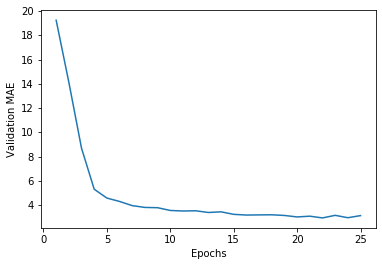

In [71]:
plt.plot(range(1, len(average_mae_history_ConTodosDatos) + 1), average_mae_history_ConTodosDatos)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [72]:
PromedioMAE_ConTodosDatos = np.mean(val_maeConTodosDatos)
PromedioMAE_ConTodosDatos

4.784287238027535

In [73]:
PromedioMAE_K_FOLD_VALIDATION

2.683033071248838

Keras es una biblioteca de Python simple y poderosa para el aprendizaje profundo.

Dado que los modelos de aprendizaje profundo pueden tomar horas, días e incluso semanas para entrenarse, es importante saber cómo guardarlos y cargarlos desde el disco.

Keras separa las preocupaciones de guardar la arquitectura de su modelo y guardar los pesos de su modelo.

Los pesos de los modelos se guardan en formato HDF5. Este es un formato de cuadrícula que es ideal para almacenar matrices de números multidimensionales.

La estructura del modelo se puede describir y guardar utilizando dos formatos diferentes: JSON y YAML.
JSON es un formato de archivo simple para describir datos jerárquicamente.

Keras proporciona la capacidad de describir cualquier modelo utilizando el formato JSON con una función to_json (). Esto se puede guardar en un archivo y luego cargarse a través de la función model_from_json () que creará un nuevo modelo a partir de la especificación JSON.

Los pesos se guardan directamente del modelo usando la función save_weights () y luego se cargan usando la función simétrica load_weights ().


In [74]:
json_string = modeloConTodosDatos.to_json()

json_string

'{"class_name": "Sequential", "config": {"name": "sequential_9", "layers": [{"class_name": "Dense", "config": {"name": "dense_25", "trainable": true, "batch_input_shape": [null, 13], "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_26", "trainable": true, "dtype": "float32", "units": 64, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "

In [75]:
from datetime import datetime
# current date and time
now = datetime.now()
now

datetime.datetime(2019, 11, 27, 18, 55, 9, 101608)

In [76]:
ahorita = now.strftime("%Y%m%d%H%M%S")
ahorita

'20191127185509'

In [77]:
MiArchivoJSON = 'ggCapLibro3_6_MiPrimeraRedNeuronal_PrediccionNumerica_' + ahorita + '.json'
MiArchivoJSON

'ggCapLibro3_6_MiPrimeraRedNeuronal_PrediccionNumerica_20191127185509.json'

In [78]:
MiArchivoPesosH5 = 'ggCapLibro3_6_MiPrimeraRedNeuronal_PrediccionNumerica_' + ahorita + '.h5'
MiArchivoPesosH5

'ggCapLibro3_6_MiPrimeraRedNeuronal_PrediccionNumerica_20191127185509.h5'

In [79]:
with open(MiArchivoJSON, "w") as json_file:
    json_file.write(json_string)

print("Almacenado del modelo JSON a disco ")

!ls -l 

Almacenado del modelo JSON a disco 
total 636
-rw--w--w- 1 saXsa saXsa 428196 nov  8 20:19 doc.html
-rw-rw-r-- 1 saXsa saXsa 114000 nov 27 18:55 gg20191127_RedNeuronal_PrediccionNumerica_ValorCasas.ipynb
-rw-rw-r-- 1 saXsa saXsa   1622 nov 27 18:55 ggCapLibro3_6_MiPrimeraRedNeuronal_PrediccionNumerica_20191127185509.json
-rw-rw-rw- 6 saXsa saXsa  83606 nov  8 19:10 jquery.min.js
-rw-rw-rw- 6 saXsa saXsa  15209 nov  8 19:09 require.min.js


## En resumen, de este ejemplo tenemos:

* La regresión se realiza utilizando diferentes funciones de pérdida (loss functions) para llevar a cabo la clasificación; Mean Squared Error (MSE) es una función de pérdida comúnmente utilizada para regresión.
* Del mismo modo, las métricas de evaluación que se utilizan para la regresión difieren de las utilizadas para la clasificación; naturalmente, el concepto de "precisión" no aplica para la regresión. Una métrica de regresión común es el Error Absoluto Medio (MAE Mean Absolute Error).
* Cuando las características en los datos de entrada tienen valores en diferentes rangos, cada característica se debe normalizar de forma independiente como un paso de preproceso de los datos.
* Cuando hay pocos datos disponibles, el uso de la validación K-Fold es una gran herramienta para evaluar un modelo de manera confiable (reliably evaluate a model).
* Cuando hay pocos datos de entrenamiento disponibles, es preferible usar una red pequeña con muy pocas capas ocultas (generalmente solo una o dos), para evitar un sobreajuste severo (avoid severe overfitting).


